## 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on notebook 03 of the Learn PyTorch for Deep Learning course: https://www.learnpytorch.io/03_pytorch_computer_vision/

2. See a live walkthrough of the solutions (errors and all) on YouTube: https://youtu.be/_PibmqpEyhA

    - **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.

3. See other solutions on the course GitHub: https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions

In [33]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else (
    "mps" if torch.mps.is_available() else "cpu"
)

2.7.1


## 5. Load the torchvision.datasets.MNIST() train and test datasets.

In [34]:
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor

train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

In [35]:
len(train_data), len(test_data)

(60000, 10000)

In [36]:
train_data.data[0].shape

torch.Size([28, 28])

## 6. Visualize at least 5 different samples of the MNIST training dataset.

In [37]:
labels = list(train_data.class_to_idx.keys())
labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

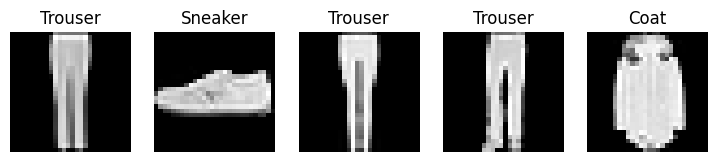

In [38]:
import random
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(9, 9))
rows, cols = 1, 5

for i in range(1, 6):
    idx = random.choice(range(len(train_data)))
    
    fig.add_subplot(rows, cols, i)
    plt.imshow(train_data.data[idx], cmap="gray")
    plt.title(labels[train_data.targets[idx]])
    plt.axis(False)

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [39]:
BATCH_SIZE=32

In [40]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(
    dataset=train_data,
    batch_size=BATCH_SIZE,
    shuffle=True,
)

test_dataloader = DataLoader(
    dataset=test_data,
    batch_size=BATCH_SIZE,
    shuffle=False
)

In [41]:
len(train_dataloader), len(test_dataloader)

(1875, 313)

In [42]:
len(train_dataloader) * BATCH_SIZE, len(test_dataloader) * BATCH_SIZE

(60000, 10016)

## 8. Recreate `model_2` used in notebook 03 (the same model from the CNN Explainer website, also known as TinyVGG) capable of fitting on the MNIST dataset.

In [ ]:
import torch
from torch import nn

class FMNISTModelExercise(nn.Module):
    
    def __init__(self, in_features: int, out_features: int, hidden_units: int):
        super().__init__()
        
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(
                in_channels=in_features,
                out_channels=hidden_units,
                kernel_size=(3, 3),
                stride=1,
                padding=1,
            ),
            nn.ReLU(),
            
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=(3, 3),
                stride=1,
                padding=1,    
            ),
            nn.ReLU(),
            
            nn.MaxPool2d(
                kernel_size=(2, 2),
                stride=2,
            ),
        )
        
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=(3, 3),
                stride=1,
                padding=1,
            ),
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=(3, 3),
                stride=1,
                padding=1,
            ),
            nn.ReLU(),
            
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=(3, 3),
                stride=1,
                padding=1,    
            ),
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=(3, 3),
                stride=1,
                padding=1,    
            ),
            nn.ReLU(),
            
            nn.MaxPool2d(
                kernel_size=(2, 2),
                stride=2,
            ),
        )
        
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(
                in_features=hidden_units * 7 * 7,
                out_features=out_features,
            ),
        )
        
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        z1 = self.conv_block_1(x)
        z2 = self.conv_block_2(z1)
        z3 = self.classifier(z2)
        
        return z3

model_cpu = FMNISTModelExercise(
    in_features = 1,
    out_features=len(labels),
    hidden_units=64,
).to("cpu")

model_mps = FMNISTModelExercise(
    in_features = 1,
    out_features=len(labels),
    hidden_units=64,
).to("mps")

model_cpu, model_mps

(FMNISTModelExercise(
   (conv_block_1): Sequential(
     (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (2): ReLU()
     (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (5): ReLU()
     (6): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
   )
   (conv_block_2): Sequential(
     (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (2): ReLU()
     (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (5): ReLU()
     (6): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
   )
   (classifier): Sequential(
     (0): Flatten(star

In [45]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates when two tensors are equal
    acc = (correct / len(y_pred)) * 100
    return acc

In [46]:
loss_fn_cpu = nn.CrossEntropyLoss()

optimizer_cpu = torch.optim.SGD(
    params=model_cpu.parameters(),
    lr=0.1,
)

In [47]:
accuracy_fn, loss_fn_cpu, optimizer_cpu

(<function __main__.accuracy_fn(y_true, y_pred)>,
 CrossEntropyLoss(),
 SGD (
 Parameter Group 0
     dampening: 0
     differentiable: False
     foreach: None
     fused: None
     lr: 0.1
     maximize: False
     momentum: 0
     nesterov: False
     weight_decay: 0
 ))

In [54]:
loss_fn_mps = nn.CrossEntropyLoss()

optimizer_mps = torch.optim.Adam(
    params=model_cpu.parameters(),
    lr=0.1,
)

In [55]:
accuracy_fn, loss_fn_mps, optimizer_mps

(<function __main__.accuracy_fn(y_true, y_pred)>,
 CrossEntropyLoss(),
 Adam (
 Parameter Group 0
     amsgrad: False
     betas: (0.9, 0.999)
     capturable: False
     decoupled_weight_decay: False
     differentiable: False
     eps: 1e-08
     foreach: None
     fused: None
     lr: 0.1
     maximize: False
     weight_decay: 0
 ))

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [ ]:
def train_step(
    model: nn.Module,
    data_loader: torch.utils.data.DataLoader,
    optimizer: torch.optim.Optimizer,
    loss_fn: nn.Module,
    accuracy_fn,
    device="cpu"
) -> None:
    """Performs training with model"""
    train_loss, train_acc = 0, 0
    
    # Put model on target device
    model = model.to(device)
    
    for X_train, y_train in data_loader:
        # Put data on target device
        X_train, y_train = X_train.to(device), y_train.to(device)
        
        # Turn on training mode
        model.train()
        
        # 1. Forward pass
        y_pred = model(X_train)
        
        # 2.1. Calculate loss
        loss = loss_fn(y_pred, y_train)
        train_loss += loss
        
        # 2.2. Calculate acc
        acc = accuracy_fn(
            y_true=y_train, 
            y_pred=y_pred.argmax(dim=1)
        )
        train_acc += acc
        
        # 3. Optimizer zero grad
        optimizer.zero_grad()
        
        # 4. Loss backwards
        loss.backward()

        # 5. Optimizer step
        optimizer.step()        
    
    # Divide total train loss and acc by length of train dataloader
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    
    # Print out what's happening
    print(f"\nTrain loss: {train_loss:.4} | Train acc: {train_acc:.4}%\n")

In [ ]:
def test_step(
    model: nn.Module,
    data_loader: torch.utils.data.DataLoader,
    loss_fn: nn.Module,
    accuracy_fn,
    device="cpu"
) -> None:
    """Performs testing with model"""
    test_loss, test_acc = 0, 0
    
    # Put model on target device
    model = model.to(device)
    
    # Turn on evaluation mode
    model.eval()
    
    with torch.inference_mode():
        for X_test, y_test in data_loader:
            # Put data on target device
            X_test, y_test = X_test.to(device), y_test.to(device)
        
            # 1. Forward pass
            y_pred = model(X_test)
            
            # 2.1 Calculate loss
            test_loss += loss_fn(y_pred, y_test)
            
            # 2.2 Calculate accuracy
            test_acc += accuracy_fn(
                y_true=y_test,
                y_pred=y_pred.argmax(dim=1) # go from logits -> prediction labels
            )

        # Divide total train loss and acc by length of train dataloader
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
    
    # Print out what's happening
    print(f"\nTest loss: {test_loss:.4f} | Test acc: {test_acc:.4f}%\n")

In [ ]:
from timeit import default_timer as timer
from tqdm.auto import tqdm

# Set seed
torch.manual_seed(42)

# Measure time
start_time_cpu = timer()

# Set epochs
epochs = 3

# Create an optimiziation and evaluation loop using train_step() and test_step()
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n")
    
    train_step(
        model=model_cpu,
        data_loader=train_dataloader,
        loss_fn=loss_fn_cpu,
        optimizer=optimizer_cpu,
        accuracy_fn=accuracy_fn,
        device="cpu",
    )
    
    test_step(
        model=model_cpu,
        data_loader=test_dataloader,
        loss_fn=loss_fn_cpu,
        accuracy_fn=accuracy_fn,
        device="cpu",
    )

# Measure time
end_time_cpu = timer()

# Calculate time
time_cpu = end_time_cpu - start_time_cpu

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0


Train loss: 2.303 | Train acc: 9.828%


Test loss: 2.3030 | Tests acc: 10.0000%

Epoch: 1


Train loss: 2.303 | Train acc: 10.0%


Test loss: 2.3035 | Tests acc: 10.0000%

Epoch: 2


Train loss: 2.303 | Train acc: 9.965%


Test loss: 2.3032 | Tests acc: 10.0000%



In [ ]:
from timeit import default_timer as timer
from tqdm.auto import tqdm

# Set seed
torch.manual_seed(42)

# Measure time
start_time_mps = timer()

# Set epochs
epochs = 3

# Create an optimiziation and evaluation loop using train_step() and test_step()
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n")
    
    train_step(
        model=model_mps,
        data_loader=train_dataloader,
        loss_fn=loss_fn_mps,
        optimizer=optimizer_mps,
        accuracy_fn=accuracy_fn,
        device="mps",
    )
    
    test_step(
        model=model_mps,
        data_loader=test_dataloader,
        loss_fn=loss_fn_mps,
        accuracy_fn=accuracy_fn,
        device="mps",
    )

# Measure time
end_time_mps = timer()

# Calculate time
time_cpu = end_time_mps - start_time_mps

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0


Train loss: 2.303 | Train acc: 10.0%


Test loss: 2.3027 | Tests acc: 10.0140%

Epoch: 1


Train loss: 2.303 | Train acc: 10.0%


Test loss: 2.3027 | Tests acc: 10.0140%

Epoch: 2



## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test `torchvision.datasets.FashionMNIST` dataset.

- Then plot some predictions where the model was wrong alongside what the label of the image should've been.
- After visualing these predictions do you think it's more of a modelling error or a data error?
- As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?